#**Guideline for Annotation of Open Seizure Database Data**

# This section provides a structured approach for the clinical annotation team to annotate the Open Seizure Database data into distinct ictal phases. In this annotation process:


1.  0 = denotes normal/postictal phases,

2.  1 = signifies ictal phases

3.  1 = represents preictal phases.


#The following script serves as a comprehensive guide, facilitating the annotation process of multimodal data. It enables the selection of events stored in Google Drive as CSV files for annotation.

#To proceed, simply replace the URL path in the third container below with the URL of the event intended for annotation. Upon executing the script by clicking "Run All", the generated analytical metrics will compile the necessary visusal plots to guide the process.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy import stats
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import warnings
import matplotlib.patches as mpatches


In [3]:

mypath = '7261.csv'#path to event and event number
columns = ['eventID','id', 'date','time','roi_Ratio','hr','output','mag','outcome']#choose the features from OSDB json file
df = pd.read_csv(mypath, header = None, names = columns)#pass params to construct a dataframe 

In [4]:
# Global Values
sample_rate = 125  # 125 values of 'mag' per second
time = np.arange(len(df["mag"])) / sample_rate * 5

In [5]:
# Assuming df is your DataFrame containing accelerometer data
# Replace 'mag' with the actual column name containing acceleration data
acceleration = df['mag']
sample_rate = 25  # 25 values of 'mag' per second
total_time = 160  # Total time in seconds
num_intervals = 32  # Number of intervals
data_points_per_interval = 125  # Data points in each 5-second interval

# Calculate the time values for each interval
time_intervals = np.arange(0, total_time, total_time / num_intervals)

# Calculate the average rate of change for each interval
avg_rate_of_change = []

for i in range(1, len(time_intervals)):
    start_index = int(time_intervals[i - 1] * sample_rate)
    end_index = int(time_intervals[i] * sample_rate)

    interval_data = acceleration[start_index:end_index]
    rate_of_change = np.diff(interval_data).mean()
    avg_rate_of_change.append(rate_of_change)

# Create a time array for plotting
time_plot = np.arange(0, total_time - total_time / num_intervals, total_time / num_intervals)


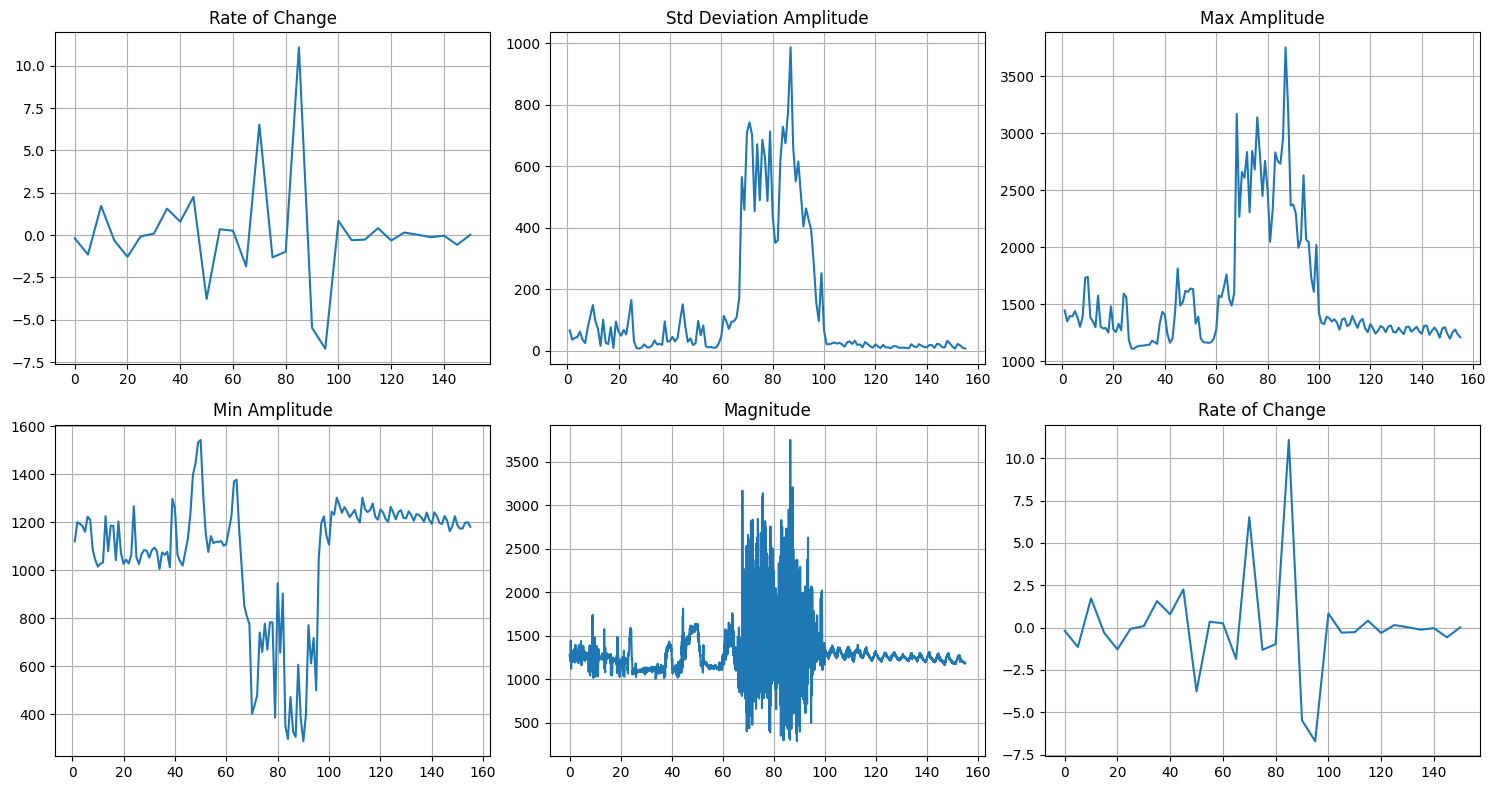

In [7]:
# Assuming 'df["mag"]' contains the magnitude of acceleration data
acceleration_magnitude = df["mag"]

# Global Values
sample_rate = 25  # 25 values of 'mag' per second
time_interval = 1  # Time interval for analysis in seconds

# Calculate the number of samples within the time interval
samples_per_interval = sample_rate * time_interval

# Calculate the number of intervals
num_intervals = len(acceleration_magnitude) // samples_per_interval

# Initialize arrays to store results for each interval
mean_amplitude = np.zeros(num_intervals)
std_deviation_amplitude = np.zeros(num_intervals)
max_amplitude = np.zeros(num_intervals)
min_amplitude = np.zeros(num_intervals)
rate_of_change = np.zeros(num_intervals)

# Perform amplitude analysis and rate of change calculation for each interval
for i in range(num_intervals):
    start_idx = i * samples_per_interval
    end_idx = (i + 1) * samples_per_interval

    # Extract the acceleration data for the current interval
    interval_data = acceleration_magnitude[start_idx:end_idx]

    # Calculate statistical measures of amplitude for the interval
    mean_amplitude[i] = np.mean(interval_data)
    std_deviation_amplitude[i] = np.std(interval_data)
    max_amplitude[i] = np.max(interval_data)
    min_amplitude[i] = np.min(interval_data)



# Create a DataFrame to store the results for each interval
results_df = pd.DataFrame({
    "Interval": range(1, num_intervals + 1),
    "Mean Amplitude": mean_amplitude,
    "Std Deviation Amplitude": std_deviation_amplitude,
    "Max Amplitude": max_amplitude,
    "Min Amplitude": min_amplitude,
    "Rate of Change": rate_of_change
})

# Create a 3x2 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Plot Mean Amplitude
axes[0, 0].plot(time_plot, avg_rate_of_change, linestyle='-', color='tab:blue')
axes[0, 0].set_title("Rate of Change")
axes[0, 0].grid(True)


# Plot Std Deviation Amplitude
axes[0, 1].plot(results_df["Interval"], results_df["Std Deviation Amplitude"])
axes[0, 1].set_title("Std Deviation Amplitude")
axes[0, 1].grid(True)


# Plot Max Amplitude
axes[0,2].plot(results_df["Interval"], results_df["Max Amplitude"])
axes[0, 2].set_title("Max Amplitude")
axes[0, 2].grid(True)


# Plot Min Amplitude
axes[1, 0].plot(results_df["Interval"], results_df["Min Amplitude"])
axes[1, 0].set_title("Min Amplitude")
axes[1, 0].grid(True)


# Plot Magnitude
axes[1, 1].plot(time, df["mag"])
axes[1, 1].set_title("Magnitude")
axes[1, 1].grid(True)


# Plot Rate of Change
axes[1, 2].plot(time_plot, avg_rate_of_change, linestyle='-', color='tab:blue')
axes[1, 2].set_title("Rate of Change")
axes[1, 2].grid(True)


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
